In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')
%matplotlib inline


In [9]:
#Read data set

df = pd.read_excel('data/flight_price.xlsx')

In [10]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [12]:
df.shape

(10683, 11)

In [13]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [14]:
# Drop nan value

df.dropna(inplace = True)

In [15]:
# Find unique value in every columns

for col in df.columns:
    print(df[col].unique())
    print('-------------------------------------------------------------------')

['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
-------------------------------------------------------------------
['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '6/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '06/03/2019' '3/06/2019' '15/03/2019' '3/05/2019'
 '9/03/2019' '6/06/2019' '24/05/2019' '09/03/2019' '1/04/2019'
 '21/04/2019' '21/06/2019' '27/03/2019' '18/03/2019' '12/04/2019'
 '9/04/2019' '1/03/2019' '03/03/2019' '27/04/2019']
-------------------------------------------------------------------
['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
-------------------------------------------------------

In [16]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])

In [17]:
# Extracting 'Date_of_Journey' Column into 'Journey_Month' & 'Journey_Date' Column: and journey year is not required
df['Journey_Day'] = df['Date_of_Journey'].dt.day
df['Journey_Month'] = df['Date_of_Journey'].dt.month

In [18]:
# Extracting Dep_Time columns into Dep_hours and Dep_min
df['Dep_hour'] = df['Dep_Time'].str.split(':').str[0]
df['Dep_min'] = df['Dep_Time'].str.split(':').str[1]

In [19]:
# change Date type object to int

df['Dep_hour'] = df['Dep_hour'].astype('int')
df['Dep_min'] = df['Dep_min'].astype('int')

In [20]:
df["Arrival_Time"]=df["Arrival_Time"].str.split(" ").str[0]

In [21]:
# Extracting Arrival_Time columns into Arrival_hour and Arrival_min 
df["Arrival_hour"]=df["Arrival_Time"].str.split(":").str[0]
df["Arrival_min"] = df["Arrival_Time"].str.split(':').str[1]

In [22]:
# change date type object to int

df["Arrival_hour"] = df["Arrival_hour"].astype('int')
df["Arrival_min"] = df["Arrival_min"].astype('int')

In [23]:
# Extracting Duration  columns into Duration_hour and Duration_min 
df['Duration_hour'] = df['Duration'].str.split().str[0]
df['Duration_min'] = df['Duration'].str.split().str[1]

In [24]:
# remove 'm' in data
df['Duration_min']=df['Duration_min'].str.replace('m' , " ") 

In [25]:
df['Duration_min']=df['Duration_min'].replace('nan' , np.nan)

In [26]:
# remove 'h' in data
df['Duration_hour']=df['Duration_hour'].str.replace('h' , ' ')

In [27]:
df[df['Duration_hour'] == '5m']

df.drop(6474 , axis = 0 , inplace = True)

In [28]:
# Change data type object to int
df['Duration_hour'] = df['Duration_hour'].astype('int')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10681 entries, 0 to 10682
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10681 non-null  object        
 1   Date_of_Journey  10681 non-null  datetime64[ns]
 2   Source           10681 non-null  object        
 3   Destination      10681 non-null  object        
 4   Route            10681 non-null  object        
 5   Dep_Time         10681 non-null  object        
 6   Arrival_Time     10681 non-null  object        
 7   Duration         10681 non-null  object        
 8   Total_Stops      10681 non-null  object        
 9   Additional_Info  10681 non-null  object        
 10  Price            10681 non-null  int64         
 11  Journey_Day      10681 non-null  int32         
 12  Journey_Month    10681 non-null  int32         
 13  Dep_hour         10681 non-null  int32         
 14  Dep_min          10681 non-null  int32     

In [30]:
# drop columns 

df.drop(['Date_of_Journey' , 'Route' , 'Dep_Time' ,'Arrival_Time' , 'Duration' , 'Additional_Info' ] , axis = 1 , inplace = True)

In [31]:
df.head(2)

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25


In [32]:
df.isna().sum()

Airline             0
Source              0
Destination         0
Total_Stops         0
Price               0
Journey_Day         0
Journey_Month       0
Dep_hour            0
Dep_min             0
Arrival_hour        0
Arrival_min         0
Duration_hour       0
Duration_min     1031
dtype: int64

In [33]:
# some nan value in Duration_min columns so replace nan value with 0

df['Duration_min'] = df['Duration_min'].fillna(0)

In [34]:
# change Data type oject to int

df['Duration_min'] = df['Duration_min'].astype('int')

In [35]:
df.isna().sum()

Airline          0
Source           0
Destination      0
Total_Stops      0
Price            0
Journey_Day      0
Journey_Month    0
Dep_hour         0
Dep_min          0
Arrival_hour     0
Arrival_min      0
Duration_hour    0
Duration_min     0
dtype: int64

In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,10681.0,9086.443123,4611.075357,1759.0,5277.0,8372.0,12373.0,79512.0
Journey_Day,10681.0,13.509784,8.479449,1.0,6.0,12.0,21.0,27.0
Journey_Month,10681.0,4.708735,1.164345,3.0,3.0,5.0,6.0,6.0
Dep_hour,10681.0,12.490684,5.748989,0.0,8.0,11.0,18.0,23.0
Dep_min,10681.0,24.406891,18.767046,0.0,5.0,25.0,40.0,55.0
Arrival_hour,10681.0,13.348937,6.859590,0.0,8.0,14.0,19.0,23.0
Arrival_min,10681.0,24.687763,16.504975,0.0,10.0,25.0,35.0,55.0
Duration_hour,10681.0,10.245857,8.494735,1.0,2.0,8.0,15.0,47.0
Duration_min,10681.0,28.328808,16.945106,0.0,15.0,30.0,45.0,55.0


In [37]:
# Define data set numerical_cols and categorical_cols
numerical_cols = []
categorical_cols = []

for col in df.columns:
    if df[col].dtype == "O":
        categorical_cols.append(col)
    else:
        numerical_cols.append(col)

In [38]:
numerical_cols

['Price',
 'Journey_Day',
 'Journey_Month',
 'Dep_hour',
 'Dep_min',
 'Arrival_hour',
 'Arrival_min',
 'Duration_hour',
 'Duration_min']

In [39]:
categorical_cols

['Airline', 'Source', 'Destination', 'Total_Stops']

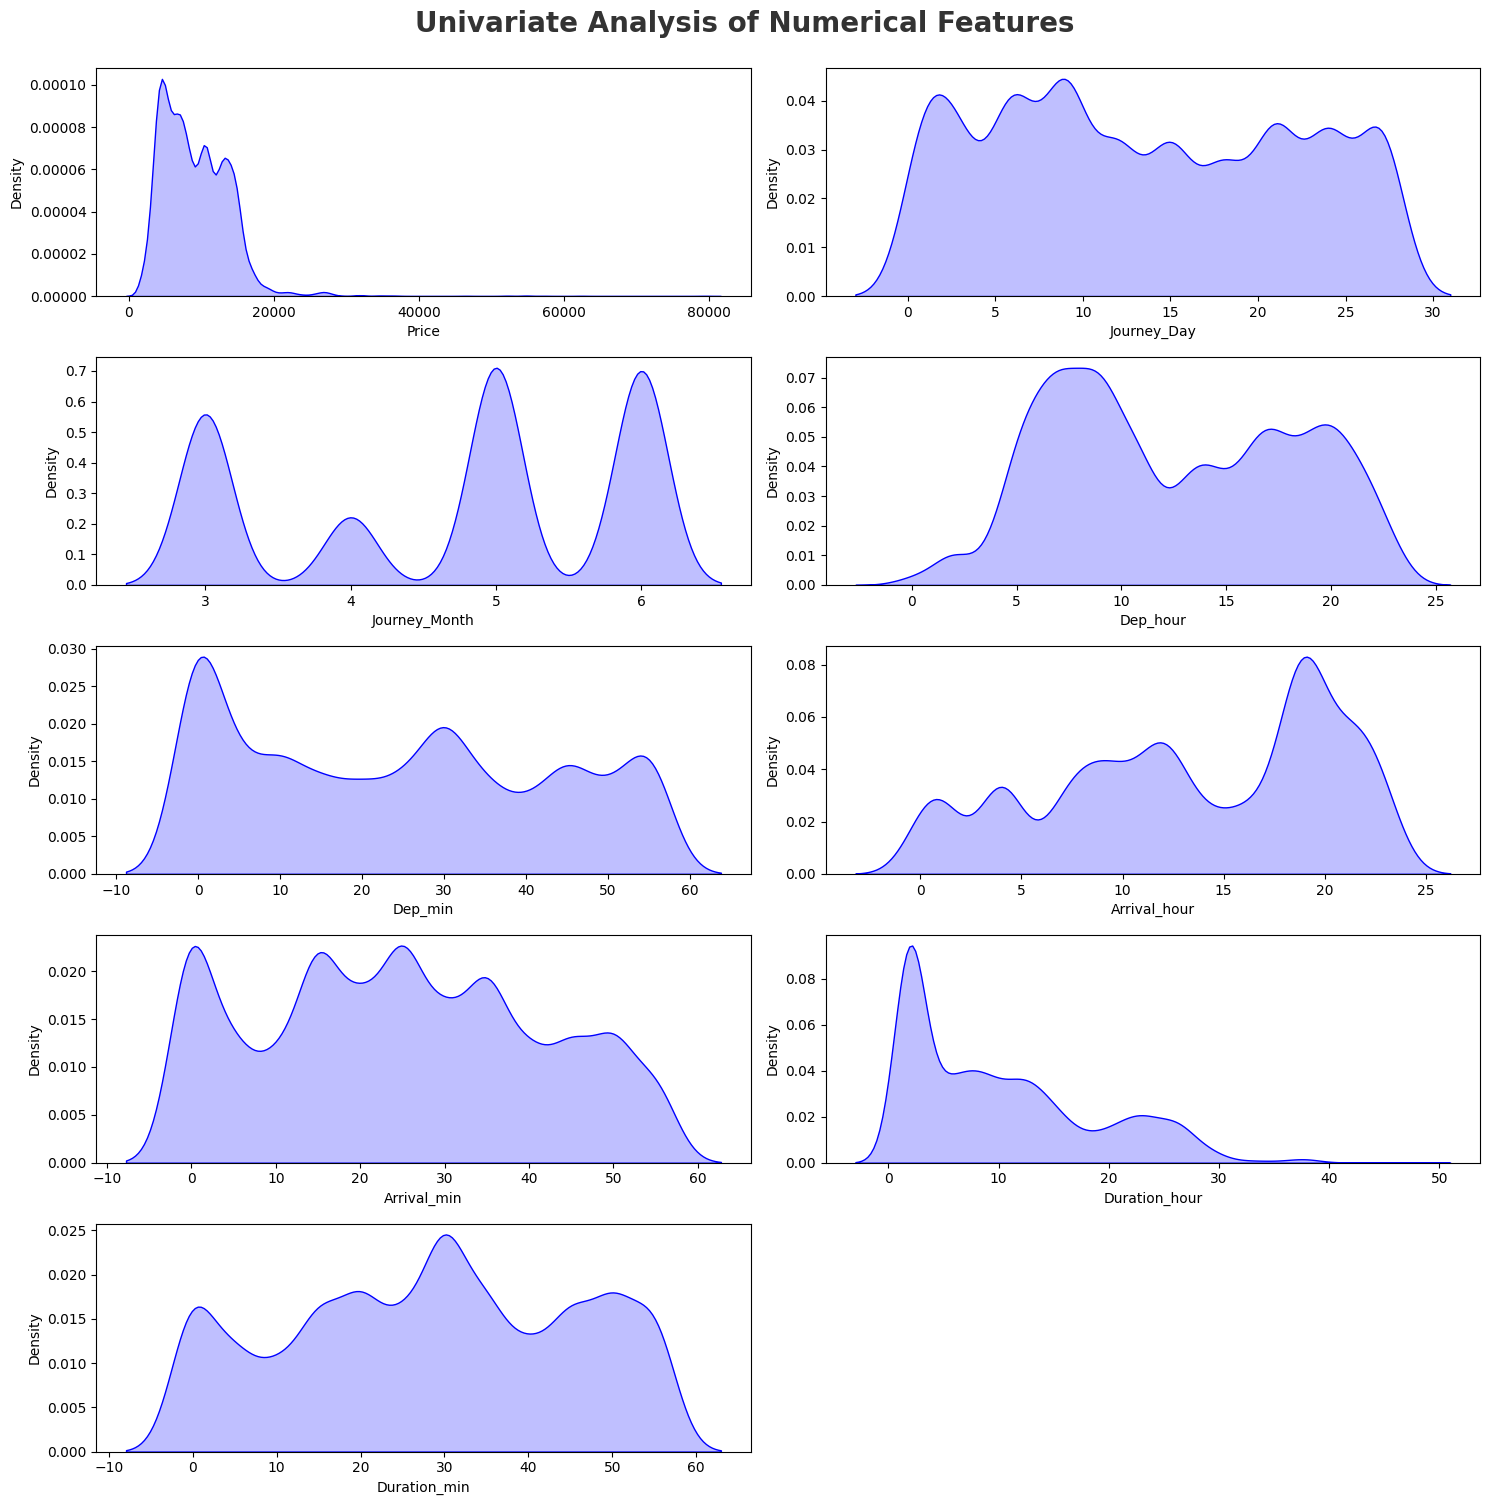

In [40]:
# Data Distribution 

plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numerical_cols)):
    plt.subplot(5, 2, i+1)
    sns.kdeplot(x=df[numerical_cols[i]],shade=True, color='b')
    plt.xlabel(numerical_cols[i])
    plt.tight_layout()

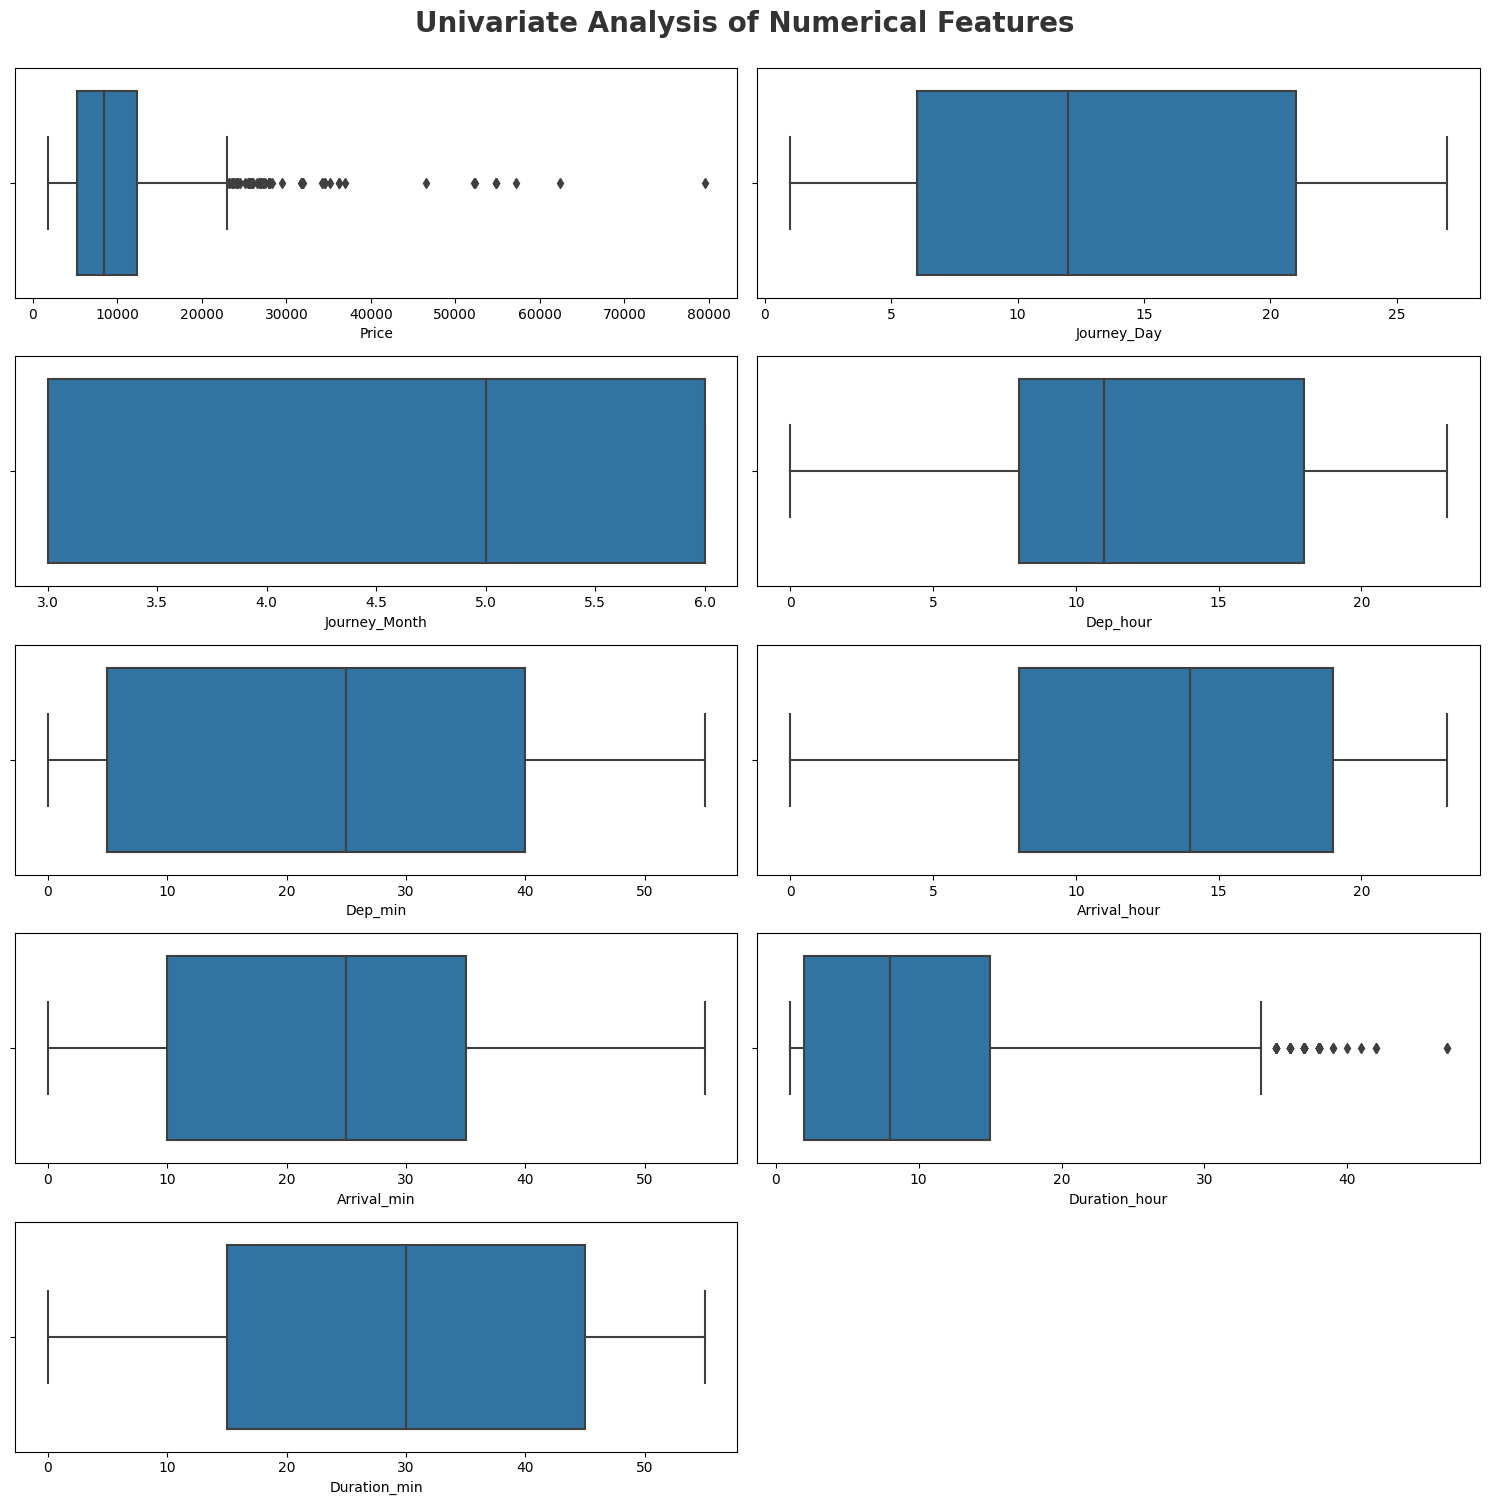

In [41]:
# Find Outlier 

plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numerical_cols)):
    plt.subplot(5, 2, i+1)
    sns.boxplot(x=df[numerical_cols[i]])
    plt.xlabel(numerical_cols[i])
    plt.tight_layout()

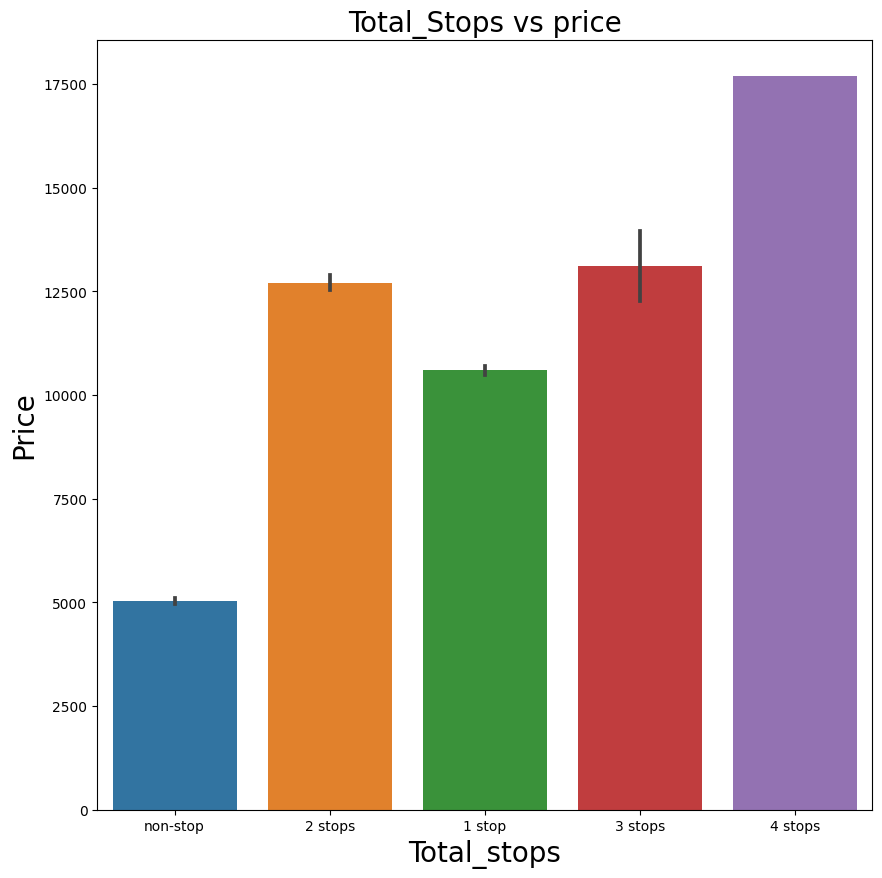

In [42]:
# Total_stop vs price distribution
plt.figure(figsize = (10,10))
plt.title('Total_Stops vs price' , fontsize = 20 , color = 'black')
sns.barplot(x = df['Total_Stops'] , y = df['Price'])
plt.xlabel('Total_stops' , fontsize = 20)
plt.ylabel('Price' , fontsize = 20)
plt.show()

In [43]:
# drop this row 
df[df['Airline'] =='Trujet']

df.drop(2878 , axis = 0 , inplace = True)

<Axes: ylabel='count'>

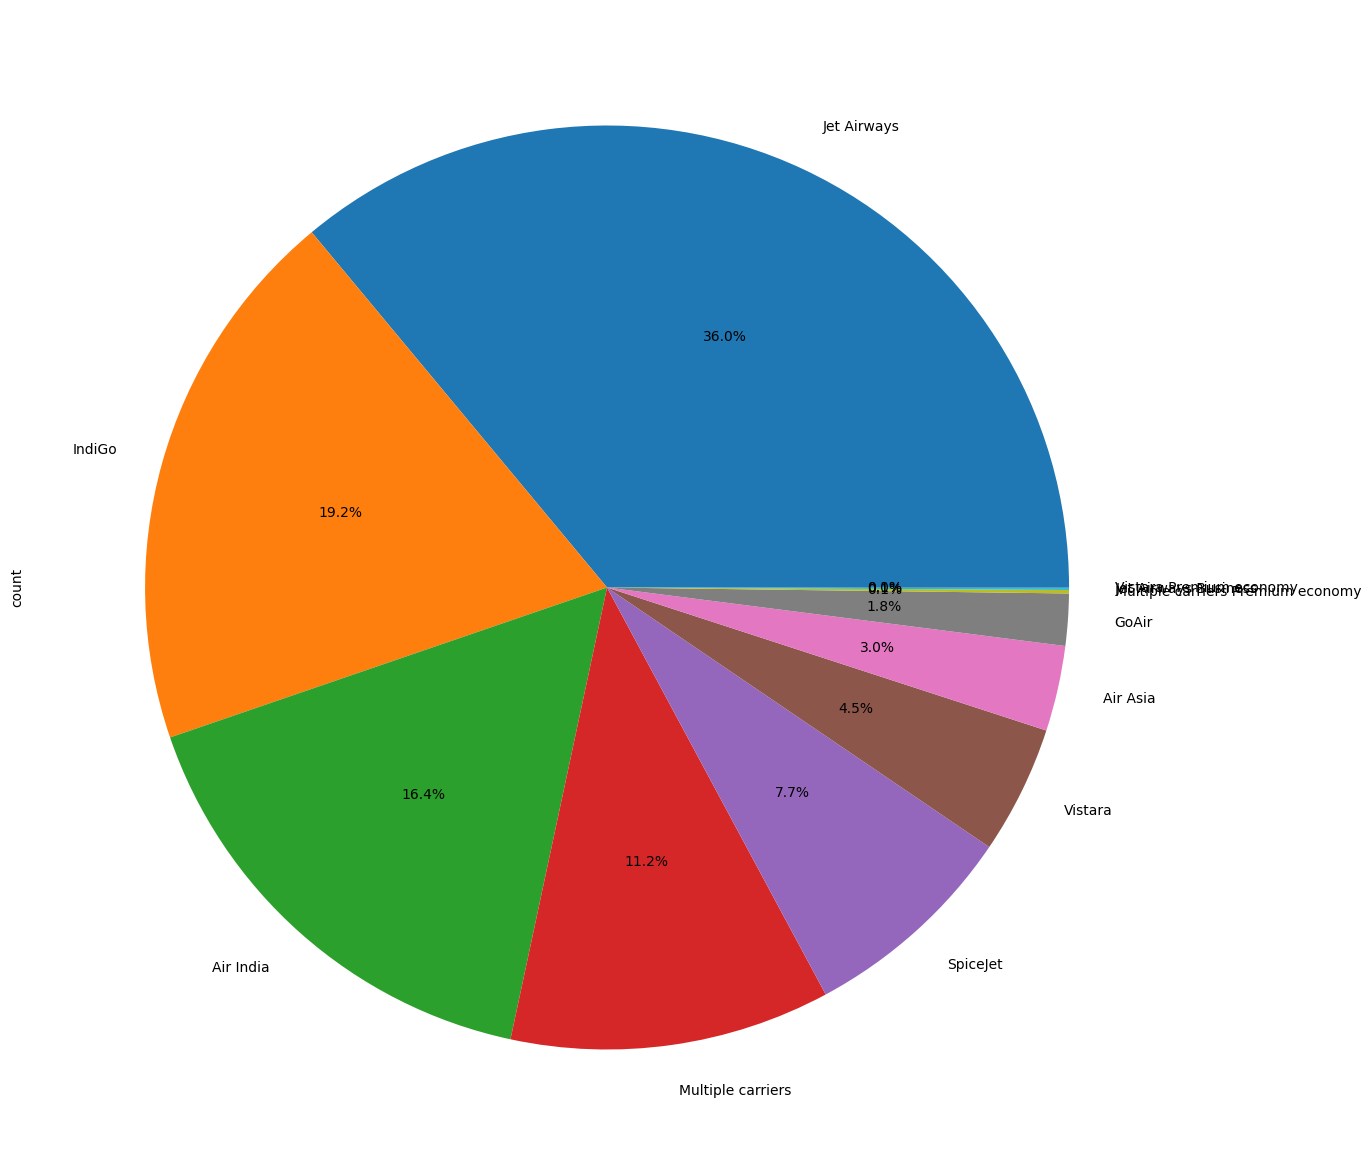

In [44]:
# Airline pie plot

df['Airline'].value_counts().plot.pie(y = df['Airline'] , figsize = (15,15) , autopct = '%2.1f%%')

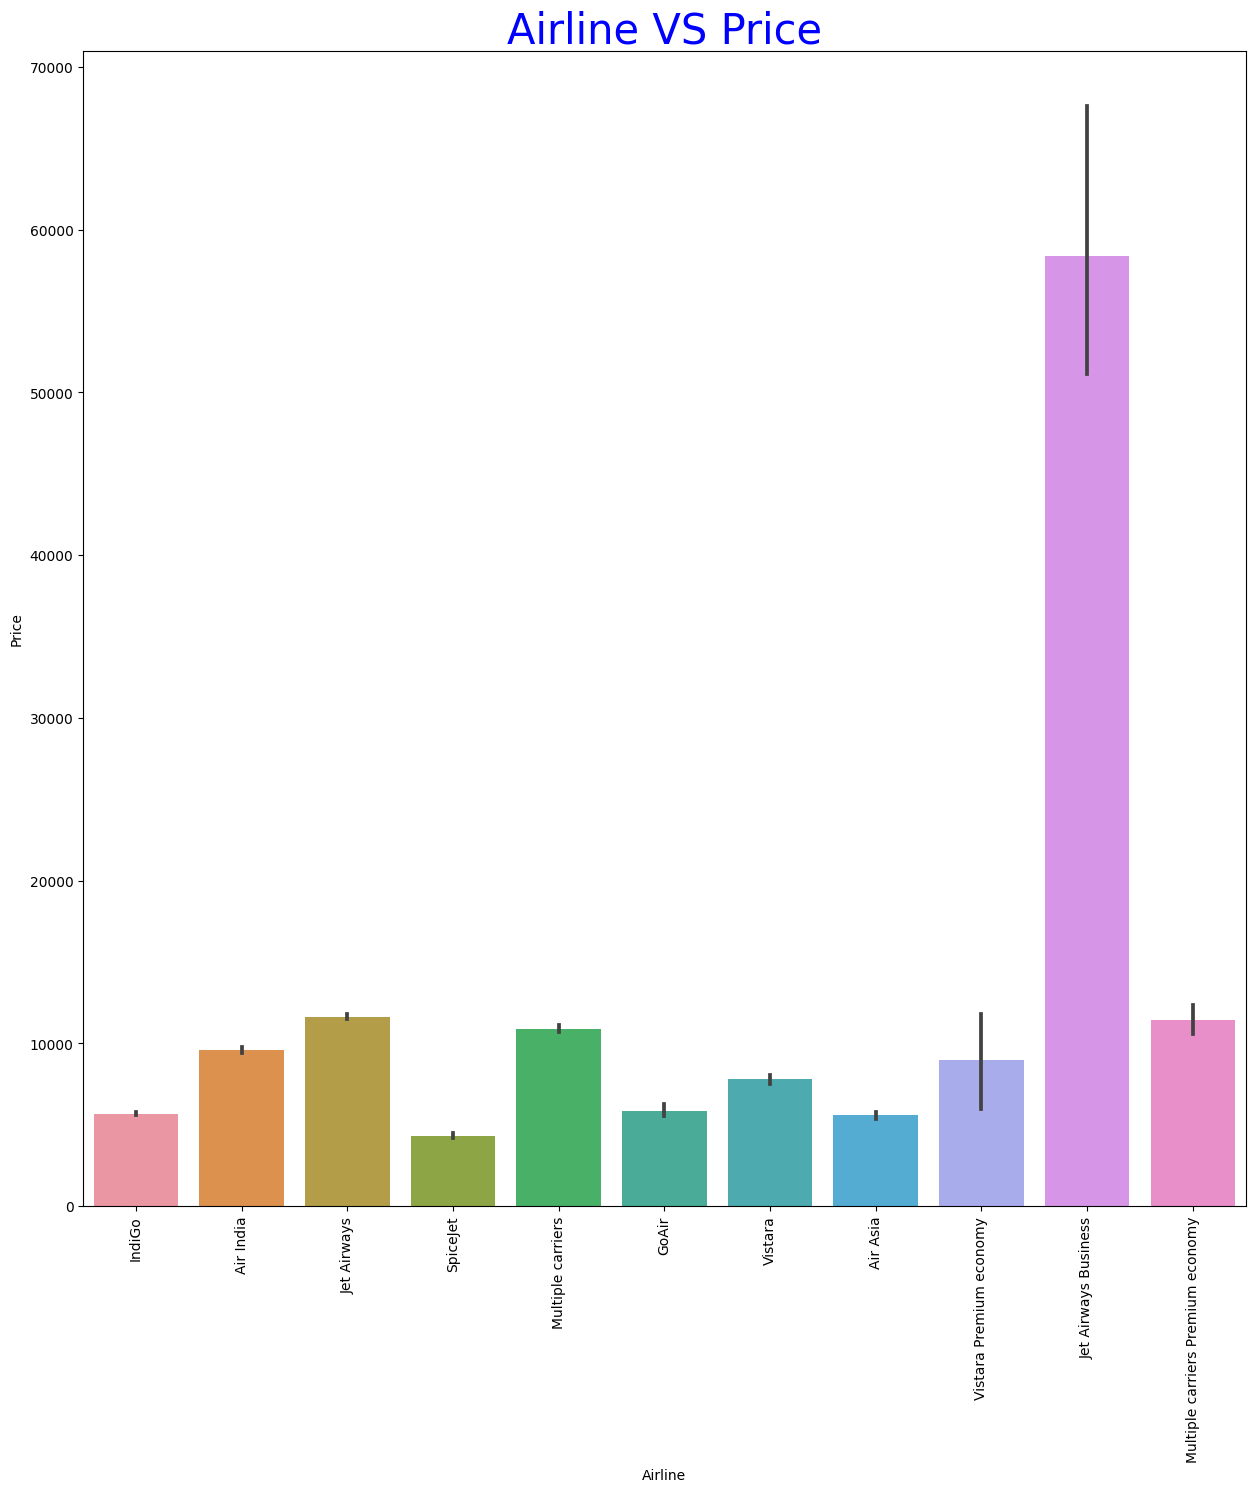

In [45]:
# Price compair to airline
plt.figure(figsize = (15,15))
plt.title('Airline VS Price' , size = 30 , color = 'b')
sns.barplot(x = df['Airline'] , y = df['Price'])
plt.xticks(rotation = 90)
plt.show()

In [46]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [47]:
df.to_csv('data/flight_price_clean_data' , index = False)